In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs 
from urllib.request import urlopen
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn") 

In [2]:
laimoon = pd.read_csv("C:/Users/Mass/Data Science/helloo.csv", delimiter=';')


In [3]:
laimoon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390 entries, 0 to 1389
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   course_Title  1390 non-null   object
 1    duaration    1390 non-null   object
 2    price        1390 non-null   object
dtypes: object(3)
memory usage: 32.7+ KB


In [4]:
laimoon.head(155)
# have space but it's already null value at 150

course_Title  \
0                  Machine Learning Certification Zaka   
1         Microsoft SQL Server Elegant Training Center   
2    Certificate in Fintech and Blockchain  LEORON ...   
3         Security Management Diploma Training Express   
4              Data Analysis In Excel Training Express   
..                                                 ...   
150  Full stack web developer Virtual Internship To...   
151                            Puppet Advanced. eduCBA   
152                Getting Started with iOS App eduCBA   
153  Splunk Enterprise Certified Admin Practice Exa...   
154                              PHP and MySQL  eduCBA   

                     duaration            price  
0          Duration:  12 Weeks        USD 2,967  
1     Duration:  Upto 22 Hours   USD 340USD 680  
2            Duration:  3 Days        USD 4,270  
3      Duration:  Upto 5 Hours    USD 21USD 400  
4      Duration:  Upto 5 Hours    USD 19USD 180  
..                         ...              ...  
150   Duration:  Upto 4 Months                   
151    Duration:  Upto 3 Hours           USD 35  
152     Duration:  Upto 1 Hour           USD 35  
153   Duration:  1 To 2 Months           USD 16  
154    Duration:  Upto 6 Hours           USD 35  

[155 rows x 3 columns]

In [5]:
laimoon.drop(150,axis=0,inplace=True)

In [6]:
laimoon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, 0 to 1389
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   course_Title  1389 non-null   object
 1    duaration    1389 non-null   object
 2    price        1389 non-null   object
dtypes: object(3)
memory usage: 43.4+ KB


In [7]:
duplicateRows = laimoon[laimoon.duplicated()]
duplicateRows


course_Title  \
257                   Google Flutter - Beginners eduCBA   
648                           Mastering MS Excel Janets   
1001  Computer Administrator and Essential IT Skills...   
1003  Food Science and Technology Advanced Diploma C...   
1004  Computer Administrator and Essential IT Skills...   
...                                                 ...   
1385  Computer Administrator and Essential IT Skills...   
1386  Computer Administrator and Essential IT Skills...   
1387  Food Science and Technology Advanced Diploma C...   
1388  Computer Administrator and Essential IT Skills...   
1389  Computer Administrator and Essential IT Skills...   

                      duaration              price  
257     Duration:  Upto 2 Hours             USD 35  
648     Duration:  Upto 4 Weeks             USD 10  
1001     Duration:  Upto 2 Days             USD 10  
1003    Duration:  Upto 5 Hours             USD 13  
1004     Duration:  Upto 2 Days             USD 10  
...                         ...                ...  
1385     Duration:  Upto 2 Days             USD 10  
1386   Duration:  Upto 30 Hours   USD 128USD 6,400  
1387    Duration:  Upto 5 Hours             USD 13  
1388     Duration:  Upto 2 Days             USD 10  
1389   Duration:  Upto 30 Hours   USD 128USD 6,400  

[390 rows x 3 columns]

In [8]:
laimoon=laimoon.drop_duplicates()

In [9]:
laimoon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1002
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   course_Title  999 non-null    object
 1    duaration    999 non-null    object
 2    price        999 non-null    object
dtypes: object(3)
memory usage: 31.2+ KB


In [10]:
for duration in laimoon[' duaration'].unique():
    print(duration)

 Duration:  12 Weeks
 Duration:  Upto 22 Hours
 Duration:  3 Days
 Duration:  Upto 5 Hours
 Duration:  Upto 3 Hours
 Duration:  Upto 1 Hour
 Duration:  Upto 11 Hours
 Duration:  Upto 4 Hours
 Duration:  Upto 93 Hours
 Duration:  30 Hours
 Duration:  Upto 56 Hours
 Duration:  Upto 2 Hours
 Duration:  Upto 16 Hours
 Duration:  1 To 2 Months
 Duration:  32 Hours
 Duration:  Upto 12 Hours
 Duration:  1 To 3 Months
 Duration:  1 To 5 Months
 Duration:  3 Hours
 Duration:  Upto 9 Hours
 Duration:  2 Hours
 Duration:  Upto 1 Year
 Duration:  Upto 19 Hours
 Duration:  10 Hours
 Duration:  6 Hours
 Duration:  7 Hours
 Duration:  1 - 2 Months
 Duration:  Upto 6 Hours
 Duration:  Upto 8 Hours
 Duration:  Upto 21 Hours
 Duration:  1 To 6 Months
 Duration:  Upto 181 Hours
 Duration:  Upto 7 Hours
 Duration:  Upto 77 Hours
 Duration:  Upto 14 Hours
 Duration:  Upto 124 Hours
 Duration:  Upto 37 Hours
 Duration:  28 Hours
 Duration:  Upto 15 Hours
 Duration:  Upto 27 Hours
 Duration:  1 To 4 Months
 

In [11]:
def fixDuaration(a):
    try:
        return (a[10:])
    except:
            return np.nan

In [12]:
laimoon[' duaration']=laimoon[' duaration'].apply(fixDuaration)

In [13]:
for duration in laimoon[' duaration'].unique():
    print(duration)

  12 Weeks
  Upto 22 Hours
  3 Days
  Upto 5 Hours
  Upto 3 Hours
  Upto 1 Hour
  Upto 11 Hours
  Upto 4 Hours
  Upto 93 Hours
  30 Hours
  Upto 56 Hours
  Upto 2 Hours
  Upto 16 Hours
  1 To 2 Months
  32 Hours
  Upto 12 Hours
  1 To 3 Months
  1 To 5 Months
  3 Hours
  Upto 9 Hours
  2 Hours
  Upto 1 Year
  Upto 19 Hours
  10 Hours
  6 Hours
  7 Hours
  1 - 2 Months
  Upto 6 Hours
  Upto 8 Hours
  Upto 21 Hours
  1 To 6 Months
  Upto 181 Hours
  Upto 7 Hours
  Upto 77 Hours
  Upto 14 Hours
  Upto 124 Hours
  Upto 37 Hours
  28 Hours
  Upto 15 Hours
  Upto 27 Hours
  1 To 4 Months
  Upto 210 Hours
  Upto 30 Hours
  Upto 13 Hours
  Upto 100 Hours
  15 Hours
  Upto 26 Hours
  Upto 10 Hours
  Upto 25 Hours
  Upto 32 Hours
  Upto 47 Hours
  5 Hours
  Upto 116 Hours
  Upto 29 Hours
  Upto 76 Hours
  9 Hours
  Upto 43 Hours
  Upto 240 Hours
  Upto 48 Hours
  TBA
  4 Hours
  14 Hours
  Upto 20 Hours
  91 Hours
  Upto 125 Hours
  Upto 165 Hours
  Upto 17 Hours
  Upto 200 Hours
  Upto 41 Hours

In [14]:
laimoon

course_Title        duaration  \
0                   Machine Learning Certification Zaka         12 Weeks   
1          Microsoft SQL Server Elegant Training Center    Upto 22 Hours   
2     Certificate in Fintech and Blockchain  LEORON ...           3 Days   
3          Security Management Diploma Training Express     Upto 5 Hours   
4               Data Analysis In Excel Training Express     Upto 5 Hours   
...                                                 ...              ...   
997                   WordPress Ultimate Course Central      Upto 1 Hour   
998   HTML JavaScript Restful API from Scratch Cours...    Upto 13 Hours   
999        Advanced Microsoft Excel 2016 Global Edulink    Upto 15 Hours   
1000  Food Science and Technology Advanced Diploma C...     Upto 5 Hours   
1002  Computer Administrator and Essential IT Skills...    Upto 30 Hours   

                  price  
0             USD 2,967  
1        USD 340USD 680  
2             USD 4,270  
3         USD 21USD 400  
4         USD 19USD 180  
...                 ...  
997       USD 22USD 180  
998              USD 24  
999              USD 36  
1000             USD 13  
1002   USD 128USD 6,400  

[999 rows x 3 columns]

In [15]:
for p in laimoon[' price'].unique():
    print(p)

 USD 2,967
 USD 340USD 680
 USD 4,270
 USD 21USD 400
 USD 19USD 180
 USD 21USD 200
 USD 15USD 320
 USD 12USD 280
 USD 22USD 210
 USD 20USD 190
 USD 27USD 123
 USD 21USD 70
 USD 35
 USD 19USD 95
 USD 16
 USD 60
 USD 99USD 236
 USD 10USD 67
 USD 25USD 83
 USD 30USD 100
 USD 25USD 100
 USD 15
 USD 20USD 133
 USD 3USD 20
 USD 23USD 92
 USD 72
 USD 8
 USD 84
 USD 21USD 105
 USD 27USD 54
 USD 13
 USD 20
 USD 19USD 127
 USD 11
 USD 21USD 48
 USD 25USD 125
 USD 5USD 23
 USD 30USD 150
 USD 5USD 29
 USD 21USD 84
 USD 30USD 120
 USD 19USD 61
 USD 24USD 115
 USD 35USD 140
 USD 12USD 80
 USD 12USD 48
 USD 272USD 544
 USD 24USD 480
 USD 13USD 260
 USD 15USD 300
 USD 225USD 450
 USD 272
 USD 170USD 340
 USD 26USD 270
 USD 20USD 63
 USD 24
 USD 10
 USD 128USD 6,400
 USD 42
 USD 25USD 390
 USD 12
 USD 73USD 1,580
 USD 12USD 260
 USD 25USD 380
 USD 93
 USD 24USD 260
 USD 50USD 100
 USD 24USD 280
 USD 67USD 1,440
 USD 15USD 140
 USD 86
 USD 98USD 707
 USD 42USD 98
 USD 22USD 100
 USD 19
 USD 54
 USD 30
 

In [16]:
def fixPrice(a):
    try:
        if 'USD' in str(a):
            return a.replace('USD', '$')
        else:
            return a  
    except:
        return np.nan

In [17]:
laimoon[' price']=laimoon[' price'].apply(fixPrice)

In [18]:
for p in laimoon[' price'].unique():
    print(p)

 $ 2,967
 $ 340$ 680
 $ 4,270
 $ 21$ 400
 $ 19$ 180
 $ 21$ 200
 $ 15$ 320
 $ 12$ 280
 $ 22$ 210
 $ 20$ 190
 $ 27$ 123
 $ 21$ 70
 $ 35
 $ 19$ 95
 $ 16
 $ 60
 $ 99$ 236
 $ 10$ 67
 $ 25$ 83
 $ 30$ 100
 $ 25$ 100
 $ 15
 $ 20$ 133
 $ 3$ 20
 $ 23$ 92
 $ 72
 $ 8
 $ 84
 $ 21$ 105
 $ 27$ 54
 $ 13
 $ 20
 $ 19$ 127
 $ 11
 $ 21$ 48
 $ 25$ 125
 $ 5$ 23
 $ 30$ 150
 $ 5$ 29
 $ 21$ 84
 $ 30$ 120
 $ 19$ 61
 $ 24$ 115
 $ 35$ 140
 $ 12$ 80
 $ 12$ 48
 $ 272$ 544
 $ 24$ 480
 $ 13$ 260
 $ 15$ 300
 $ 225$ 450
 $ 272
 $ 170$ 340
 $ 26$ 270
 $ 20$ 63
 $ 24
 $ 10
 $ 128$ 6,400
 $ 42
 $ 25$ 390
 $ 12
 $ 73$ 1,580
 $ 12$ 260
 $ 25$ 380
 $ 93
 $ 24$ 260
 $ 50$ 100
 $ 24$ 280
 $ 67$ 1,440
 $ 15$ 140
 $ 86
 $ 98$ 707
 $ 42$ 98
 $ 22$ 100
 $ 19
 $ 54
 $ 30
 $ 17$ 257
 $ 25$ 320
 $ 25$ 280
 $ 24$ 120
 $ 12$ 650
 $ 21$ 153
 $ 14
 $ 10$ 250
 $ 25$ 260
 $ 16$ 180
 $ 31$ 330
 $ 25$ 460
 $ 47
 $ 21$ 525
 $ 64$ 680
 $ 20$ 79
 $ 25$ 180
 $ 25$ 340
 $ 24$ 160
 $ 25$ 700
 $ 11$ 400
 $ 15$ 340
 $ 199
 $ 22$ 450
 $ 22$ 180
 $ 61

In [19]:
def processNumber(num): 
    parts = num.split("$") 
    firstNumber = None
    secondNumber = None 
    for part in parts: 
        part = ''.join(filter(str.isdigit, part)) 
        if part:
            if firstNumber is None:
                firstNumber = int(part)
            elif secondNumber is None:
                secondNumber = int(part) 
    if firstNumber is not None and secondNumber is None:
        second_number = 0 
    return firstNumber, secondNumber

In [20]:
 laimoon[['afterDiscount', 'beforeDiscount']] = pd.DataFrame(laimoon[' price'].apply(processNumber).tolist(), index=laimoon.index)

In [21]:
for p in laimoon['afterDiscount'].unique():
    print(p)

2967
340
4270
21
19
15
12
22
20
27
35
16
60
99
10
25
30
3
23
72
8
84
13
11
5
24
272
225
170
26
128
42
73
93
50
67
86
98
54
17
14
31
47
64
199
61
49
89
136
36
106
44
34
56
32
62
46
69
39


In [22]:
laimoon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1002
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   course_Title    999 non-null    object 
 1    duaration      999 non-null    object 
 2    price          999 non-null    object 
 3   afterDiscount   999 non-null    int64  
 4   beforeDiscount  531 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 46.8+ KB


In [23]:
laimoon.head()


course_Title        duaration  \
0                Machine Learning Certification Zaka         12 Weeks   
1       Microsoft SQL Server Elegant Training Center    Upto 22 Hours   
2  Certificate in Fintech and Blockchain  LEORON ...           3 Days   
3       Security Management Diploma Training Express     Upto 5 Hours   
4            Data Analysis In Excel Training Express     Upto 5 Hours   

         price  afterDiscount  beforeDiscount  
0      $ 2,967           2967             NaN  
1   $ 340$ 680            340           680.0  
2      $ 4,270           4270             NaN  
3    $ 21$ 400             21           400.0  
4    $ 19$ 180             19           180.0

In [24]:
laimoon.to_csv("final_shape.csv")

In [25]:
for p in laimoon[' price'].unique():
    print(p)

 $ 2,967
 $ 340$ 680
 $ 4,270
 $ 21$ 400
 $ 19$ 180
 $ 21$ 200
 $ 15$ 320
 $ 12$ 280
 $ 22$ 210
 $ 20$ 190
 $ 27$ 123
 $ 21$ 70
 $ 35
 $ 19$ 95
 $ 16
 $ 60
 $ 99$ 236
 $ 10$ 67
 $ 25$ 83
 $ 30$ 100
 $ 25$ 100
 $ 15
 $ 20$ 133
 $ 3$ 20
 $ 23$ 92
 $ 72
 $ 8
 $ 84
 $ 21$ 105
 $ 27$ 54
 $ 13
 $ 20
 $ 19$ 127
 $ 11
 $ 21$ 48
 $ 25$ 125
 $ 5$ 23
 $ 30$ 150
 $ 5$ 29
 $ 21$ 84
 $ 30$ 120
 $ 19$ 61
 $ 24$ 115
 $ 35$ 140
 $ 12$ 80
 $ 12$ 48
 $ 272$ 544
 $ 24$ 480
 $ 13$ 260
 $ 15$ 300
 $ 225$ 450
 $ 272
 $ 170$ 340
 $ 26$ 270
 $ 20$ 63
 $ 24
 $ 10
 $ 128$ 6,400
 $ 42
 $ 25$ 390
 $ 12
 $ 73$ 1,580
 $ 12$ 260
 $ 25$ 380
 $ 93
 $ 24$ 260
 $ 50$ 100
 $ 24$ 280
 $ 67$ 1,440
 $ 15$ 140
 $ 86
 $ 98$ 707
 $ 42$ 98
 $ 22$ 100
 $ 19
 $ 54
 $ 30
 $ 17$ 257
 $ 25$ 320
 $ 25$ 280
 $ 24$ 120
 $ 12$ 650
 $ 21$ 153
 $ 14
 $ 10$ 250
 $ 25$ 260
 $ 16$ 180
 $ 31$ 330
 $ 25$ 460
 $ 47
 $ 21$ 525
 $ 64$ 680
 $ 20$ 79
 $ 25$ 180
 $ 25$ 340
 $ 24$ 160
 $ 25$ 700
 $ 11$ 400
 $ 15$ 340
 $ 199
 $ 22$ 450
 $ 22$ 180
 $ 61

In [26]:
laimoon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1002
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   course_Title    999 non-null    object 
 1    duaration      999 non-null    object 
 2    price          999 non-null    object 
 3   afterDiscount   999 non-null    int64  
 4   beforeDiscount  531 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 46.8+ KB


In [27]:
for p in laimoon[' duaration'].unique():
    print(p)

  12 Weeks
  Upto 22 Hours
  3 Days
  Upto 5 Hours
  Upto 3 Hours
  Upto 1 Hour
  Upto 11 Hours
  Upto 4 Hours
  Upto 93 Hours
  30 Hours
  Upto 56 Hours
  Upto 2 Hours
  Upto 16 Hours
  1 To 2 Months
  32 Hours
  Upto 12 Hours
  1 To 3 Months
  1 To 5 Months
  3 Hours
  Upto 9 Hours
  2 Hours
  Upto 1 Year
  Upto 19 Hours
  10 Hours
  6 Hours
  7 Hours
  1 - 2 Months
  Upto 6 Hours
  Upto 8 Hours
  Upto 21 Hours
  1 To 6 Months
  Upto 181 Hours
  Upto 7 Hours
  Upto 77 Hours
  Upto 14 Hours
  Upto 124 Hours
  Upto 37 Hours
  28 Hours
  Upto 15 Hours
  Upto 27 Hours
  1 To 4 Months
  Upto 210 Hours
  Upto 30 Hours
  Upto 13 Hours
  Upto 100 Hours
  15 Hours
  Upto 26 Hours
  Upto 10 Hours
  Upto 25 Hours
  Upto 32 Hours
  Upto 47 Hours
  5 Hours
  Upto 116 Hours
  Upto 29 Hours
  Upto 76 Hours
  9 Hours
  Upto 43 Hours
  Upto 240 Hours
  Upto 48 Hours
  TBA
  4 Hours
  14 Hours
  Upto 20 Hours
  91 Hours
  Upto 125 Hours
  Upto 165 Hours
  Upto 17 Hours
  Upto 200 Hours
  Upto 41 Hours

In [28]:
def replaceKeywords(a):
    a = a.replace('Upto', '<')
    a = a.replace('To', '-')
    return a

laimoon.loc[:, ' duaration'] = laimoon[' duaration'].apply(replaceKeywords)

In [29]:
for p in laimoon[' duaration'].unique():
    print(p)

  12 Weeks
  < 22 Hours
  3 Days
  < 5 Hours
  < 3 Hours
  < 1 Hour
  < 11 Hours
  < 4 Hours
  < 93 Hours
  30 Hours
  < 56 Hours
  < 2 Hours
  < 16 Hours
  1 - 2 Months
  32 Hours
  < 12 Hours
  1 - 3 Months
  1 - 5 Months
  3 Hours
  < 9 Hours
  2 Hours
  < 1 Year
  < 19 Hours
  10 Hours
  6 Hours
  7 Hours
  < 6 Hours
  < 8 Hours
  < 21 Hours
  1 - 6 Months
  < 181 Hours
  < 7 Hours
  < 77 Hours
  < 14 Hours
  < 124 Hours
  < 37 Hours
  28 Hours
  < 15 Hours
  < 27 Hours
  1 - 4 Months
  < 210 Hours
  < 30 Hours
  < 13 Hours
  < 100 Hours
  15 Hours
  < 26 Hours
  < 10 Hours
  < 25 Hours
  < 32 Hours
  < 47 Hours
  5 Hours
  < 116 Hours
  < 29 Hours
  < 76 Hours
  9 Hours
  < 43 Hours
  < 240 Hours
  < 48 Hours
  TBA
  4 Hours
  14 Hours
  < 20 Hours
  91 Hours
  < 125 Hours
  < 165 Hours
  < 17 Hours
  < 200 Hours
  < 41 Hours
  < 24 Hours
  < 18 Hours
  < 1 Day
  30 - 60 Hours
  < 2 Days
  1 - 30 Hours
  < 4 Days
  < 4 Weeks
  1 Hour
  < 5 Days
  < 62 Hours
  40 Hours
  20 Hours
 

In [30]:
def convertToHours(a):
    if '> 1 Day' in a:
       return a.replace('< 1 Day','< 24 Hours')
    elif '> 2 Days' in a:
       return a.replace('< 2 Day','< 48 Hours')
    elif '> 4 Days' in a:
       return a.replace('< 4 Days','< 96 Hours')
    elif ' > 4 Weeks' in a:
       return a.replace(' < 4 Weeks','< 672 Hours')
    elif '> 5 Days' in a:
       return a.replace('< 5 Day','< 120 Hours')     
    elif '> 2 Weeks' in a:
       return a.replace('< 2 Weeks','< 336 Hours')
    elif '> 12 Months' in a:
       return a.replace('< 12 Months','< 8640 Hours')
    elif '> 6 Days' in a:
       return a.replace('< 6 Days','< 144 Hours')
    elif '> 5 Days' in a:
       return a.replace('< 5 Day','< 120 Hours')
    elif '  12 Weeks' in a:
       return a.replace('  12 Weeks',' 86 Hours')
    elif '3 Days' in a:
       return a.replace('3 Days','72 Hours') 
    elif '1 - 2 Months' in a:
       return a.replace('1 - 2 Months','720 - 1440 Hours')
    elif '1 - 3 Months' in a:
       return a.replace('1 - 3 Months','720 - 2160 Hours')
    elif '1 - 5 Months' in a:
       return a.replace('1 - 5 Months','720 - 3600 Hours')
    elif '1 - 4 Months' in a:
       return a.replace('1 - 4 Months','720 - 2880 Hours')   
    elif '1 Year' in a:
       return a.replace('1 Year','8760 Hours')
    elif '1 - 6 Months' in a:
       return a.replace('1 - 6 Months','720 - 4320 Hours')
    elif '< 1 Week' in a:
       return a.replace('< 1 Week','< 168 Hours')
    elif '  < 1 Day' in a:
       return a.replace('  < 1 Day','< 24 Hours')
    elif '  < 6 Days' in a:
       return a.replace('  < 6 Days','< 144 Hours')
    elif '  < 4 Weeks' in a:
       return a.replace(' < 4 Week','< 672 Hours')
    elif '  < 2 Days' in a:
       return a.replace('  < 2 Days','< 48 Hours')
    elif '  < 2 Weekss' in a:
       return a.replace('  < 2 Weeks','< 336 Hours')
    elif '  < 4 Days' in a:
       return a.replace('  < 4 Days','< 96 Hours')
    elif '  < 5 Days' in a:
       return a.replace('  < 5 Days','< 120 Hours')
    elif '  < 2 Weeks' in a:
       return a.replace('  < 2 Weeks','< 336 Hours')
    elif '  < 12 Months' in a:
       return a.replace(  '< 12 Months','< 8640 Hours') 
    elif '  < 4 Months' in a:
       return a.replace(  '  < 4 Months','< 3040 Hours')
    else:
        return a
         

In [31]:
laimoon.loc[:, ' duaration'] = laimoon[' duaration'].apply(convertToHours)

In [32]:
for p in laimoon[' duaration'].unique():
    print(p)

 86 Hours
  < 22 Hours
  72 Hours
  < 5 Hours
  < 3 Hours
  < 1 Hour
  < 11 Hours
  < 4 Hours
  < 93 Hours
  30 Hours
  < 56 Hours
  < 2 Hours
  < 16 Hours
  720 - 1440 Hours
  32 Hours
  < 12 Hours
  720 - 2160 Hours
  720 - 3600 Hours
  3 Hours
  < 9 Hours
  2 Hours
  < 8760 Hours
  < 19 Hours
  10 Hours
  6 Hours
  7 Hours
  < 6 Hours
  < 8 Hours
  < 21 Hours
  720 - 4320 Hours
  < 181 Hours
  < 7 Hours
  < 77 Hours
  < 14 Hours
  < 124 Hours
  < 37 Hours
  28 Hours
  < 15 Hours
  < 27 Hours
  720 - 2880 Hours
  < 210 Hours
  < 30 Hours
  < 13 Hours
  < 100 Hours
  15 Hours
  < 26 Hours
  < 10 Hours
  < 25 Hours
  < 32 Hours
  < 47 Hours
  5 Hours
  < 116 Hours
  < 29 Hours
  < 76 Hours
  9 Hours
  < 43 Hours
  < 240 Hours
  < 48 Hours
  TBA
  4 Hours
  14 Hours
  < 20 Hours
  91 Hours
  < 125 Hours
  < 165 Hours
  < 17 Hours
  < 200 Hours
  < 41 Hours
  < 24 Hours
  < 18 Hours
< 24 Hours
  30 - 60 Hours
< 48 Hours
  1 - 30 Hours
< 96 Hours
 < 672 Hourss
  1 Hour
< 120 Hours
  < 62 

In [33]:
laimoon.drop(columns=[' price'], inplace=True)#remove price coulmn
laimoon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1002
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   course_Title    999 non-null    object 
 1    duaration      999 non-null    object 
 2   afterDiscount   999 non-null    int64  
 3   beforeDiscount  531 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.0+ KB


In [34]:
q1 = laimoon['beforeDiscount'].quantile(0.25)
q3 = laimoon['beforeDiscount'].quantile(0.75)
iqr = q3 - q1
 
lowerBound = q1 - 1.5 * iqr
upperBound = q3 + 1.5 * iqr
outliers = laimoon[(laimoon['beforeDiscount'] < lowerBound) | (laimoon['beforeDiscount'] > upperBound)]
outliers

course_Title       duaration  \
566   International Higher Diploma in Software Devel...    1 - 30 Hours   
571   Cisco CCNA Interconnecting Cisco Networking De...      < 17 Hours   
587   Identity with Windows Server 2016 (MCSA) John ...      < 18 Hours   
671   Certified Secure Web Application Engineer (CSW...       < 7 Hours   
690   Internet Business Associate Certificate Alpha ...       < 4 Hours   
723   Complete Unity® and Android Development Academ...    1 - 30 Hours   
728   Certified Android Apps Developer Academy for H...    1 - 30 Hours   
762   The Complete Android App Development Academy f...    1 - 30 Hours   
810      70-246 - Monitoring and Operating John Academy       < 8 Hours   
839   Excel using Programming Languages. Academy for...    1 - 30 Hours   
842   Microsoft Powerpoint Beginner to Advanced Alph...       < 8 Hours   
857   Full-Stack Software Development with Machine L...    1 - 30 Hours   
876   Configuring Windows Server R2 Active Directory...      < 15 Hours   
877   The Complete Full-Stack JavaScript Program Aca...    1 - 30 Hours   
930   Computer Programming Specialist Certificate Ac...      < 30 Hours   
985   Microsoft Office 2016 Excel Intermediate John ...       < 4 Hours   
986          CompTIA Linux+ Certification Alpha Academy      < 19 Hours   
1002  Computer Administrator and Essential IT Skills...      < 30 Hours   

      afterDiscount  beforeDiscount  
566             128          6400.0  
571              73          1580.0  
587              67          1440.0  
671              61          1320.0  
690              30          1000.0  
723             128          6400.0  
728             128          6400.0  
762             128          6400.0  
810              67          1440.0  
839             128          6400.0  
842              30          1000.0  
857             128          6400.0  
876              67          1440.0  
877             128          6400.0  
930             128          6400.0  
985              67          1440.0  
986              30          1000.0  
1002            128          6400.0

In [35]:
q1 = laimoon['afterDiscount'].quantile(0.25)
q3 = laimoon['afterDiscount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliersAfter = laimoon[(laimoon['afterDiscount'] < lower_bound) | (laimoon['afterDiscount'] > upper_bound)]
outliersAfter
# mean = np.mean( laimoon['afterDiscount'])
# std = np.std( laimoon['afterDiscount'])
# threshold = 3
# outliersAfter = []
# for i in  laimoon['afterDiscount']:
#     z = (i-mean)/std
#     if z > threshold:
#         outliersAfter.append(i)
# outliersAfter # just 2 outlier 

course_Title           duaration  \
0                   Machine Learning Certification Zaka            86 Hours   
1          Microsoft SQL Server Elegant Training Center          < 22 Hours   
2     Certificate in Fintech and Blockchain  LEORON ...            72 Hours   
31                           MS Power Point 2021 eduCBA             3 Hours   
81          Master of Cloud Computing Testprep Training    720 - 4320 Hours   
...                                                 ...                 ...   
912   Configuring Advanced Windows Server 2012 Servi...          < 17 Hours   
930   Computer Programming Specialist Certificate Ac...          < 30 Hours   
954              Microsoft Office 2016 Bundle 1TRAINING          < 30 Hours   
985   Microsoft Office 2016 Excel Intermediate John ...           < 4 Hours   
1002  Computer Administrator and Essential IT Skills...          < 30 Hours   

      afterDiscount  beforeDiscount  
0              2967             NaN  
1               340           680.0  
2              4270             NaN  
31               99           236.0  
81               72             NaN  
...             ...             ...  
912              98           707.0  
930             128          6400.0  
954              69           507.0  
985              67          1440.0  
1002            128          6400.0  

[97 rows x 4 columns]

In [36]:
laimoon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 1002
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   course_Title    999 non-null    object 
 1    duaration      999 non-null    object 
 2   afterDiscount   999 non-null    int64  
 3   beforeDiscount  531 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.0+ KB


# 1. What is the average price of the courses before discount?

In [37]:
avgPriceBeforeDiscount = laimoon['beforeDiscount'].mean()
avgPriceBeforeDiscount

410.58003766478345

# 2.What is the average price of the courses after discount?

In [38]:
averagePrice = laimoon['afterDiscount'].mean()
averagePrice

48.390390390390394

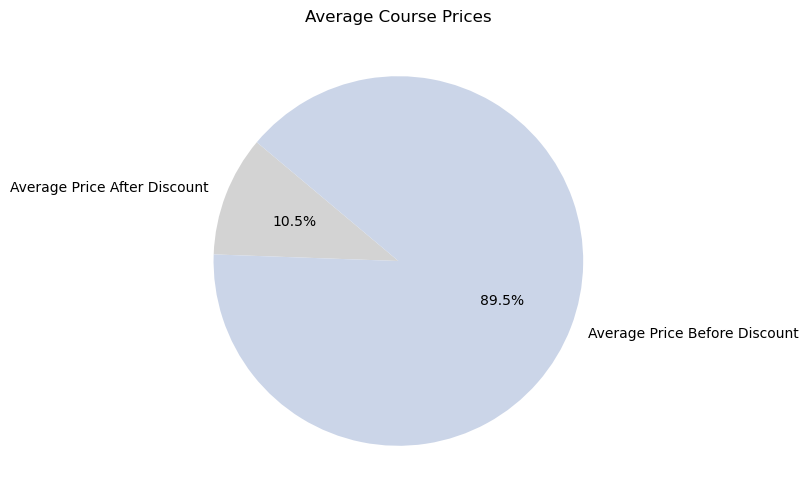

In [39]:
average_prices = [averagePrice, avgPriceBeforeDiscount]
labels = ['Average Price After Discount', 'Average Price Before Discount']
colors = ['lightgray', '#CBD5E8']
plt.figure(figsize=(8, 6))
plt.pie(average_prices, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Average Course Prices')
plt.show()

# 3-How many courses in the dataset have a discount, and how many do not?

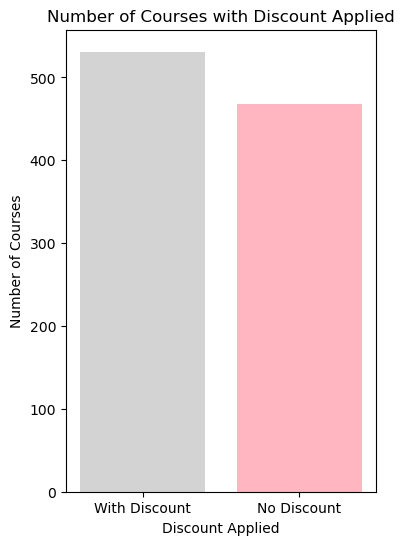

In [40]:
discountedCourses = laimoon['beforeDiscount'].notna().sum()
noDiscountCourses = laimoon['beforeDiscount'].isna().sum() 
plt.figure(figsize=(4, 6))
plt.bar(['With Discount', 'No Discount'], [discountedCourses, noDiscountCourses], color=['lightgray', '#FFB6C1'])
plt.xlabel('Discount Applied')
plt.ylabel('Number of Courses')
plt.title('Number of Courses with Discount Applied')
plt.show() #comparison between different category

# 4-What are the most common 10 course titles in the dataset?

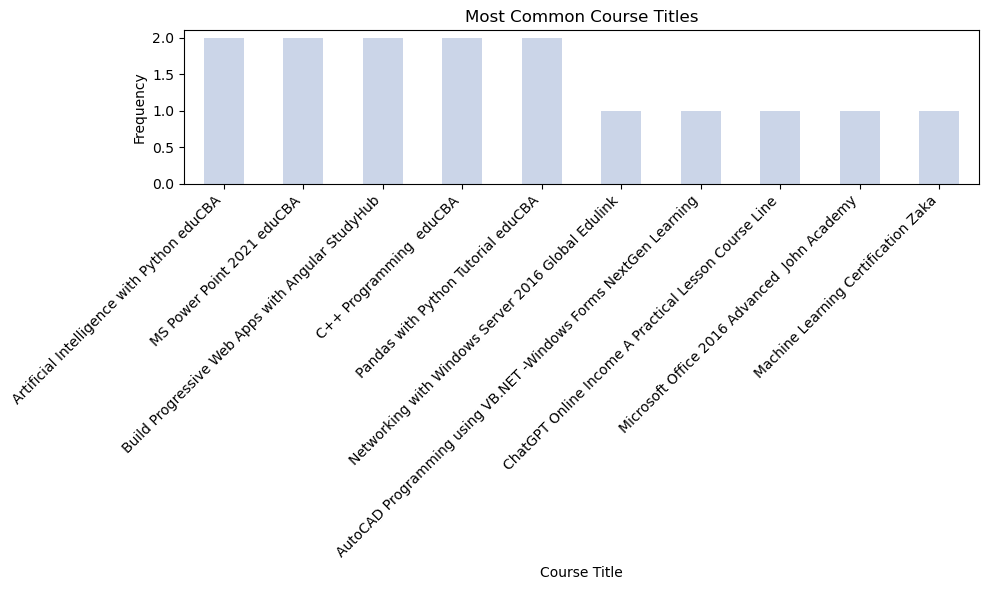

In [41]:
topCourseTitle = laimoon['course_Title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
topCourseTitle.plot(kind='bar', color='#CBD5E8')
plt.title('Most Common Course Titles')
plt.xlabel('Course Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()  # bar plot 
# top = 10  # Specify the number of top course titles to display
# courseTitles = laimoon['course_Title'].value_counts().head(top)
# colors = ['lightblue', 'lightgray','lightblue','lightgray']

# # Plotting
# plt.figure(figsize=(30, 30))
# plt.pie(courseTitles, labels=courseTitles.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12, 'color': 'black'})
# plt.title('Top 10 Most Common Course Titles', fontsize=16, color='black')
# plt.axis('equal')  #drawn as a circle
# plt.show()

 

# 5.What is the distribution of courses with and without discounts

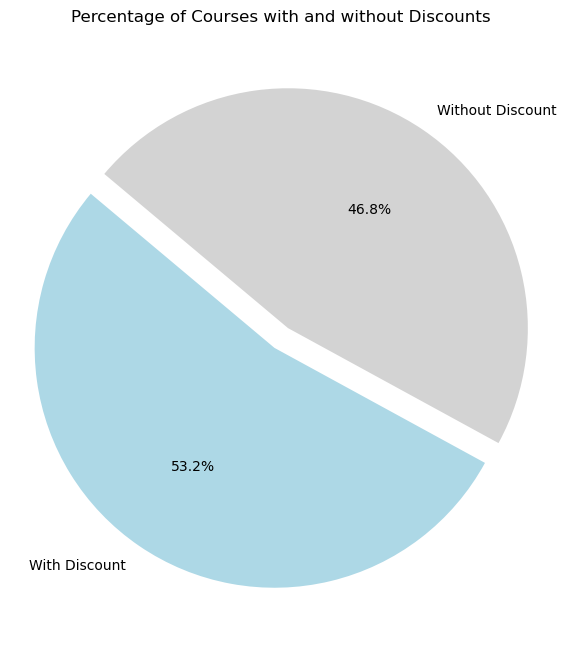

In [42]:
coursesWithDiscount = laimoon[laimoon['afterDiscount'] < laimoon['beforeDiscount']].shape[0]
coursesWithoutDiscount = len(laimoon) - coursesWithDiscount
labels = ['With Discount', 'Without Discount']
sizes = [coursesWithDiscount, coursesWithoutDiscount]
colors = ['lightblue', 'lightgray']
explode = (0.1, 0) 
plt.figure(figsize=(7, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Courses with and without Discounts')
plt.axis('equal')  
plt.show() #distribution

# 6-What course that take upto  24  Hours from  all courses?

In [43]:
courses = laimoon[laimoon[' duaration'] =='  < 24  Hours']
courses

course_Title      duaration  \
710  Beginners Coding & Web Development Combined Ce...    < 24  Hours   

     afterDiscount  beforeDiscount  
710             24           299.0

In [44]:
averagePrice = laimoon['afterDiscount'].mean()
averagePrice

48.390390390390394

# 7.what is the Top 10 Most Popular duaration

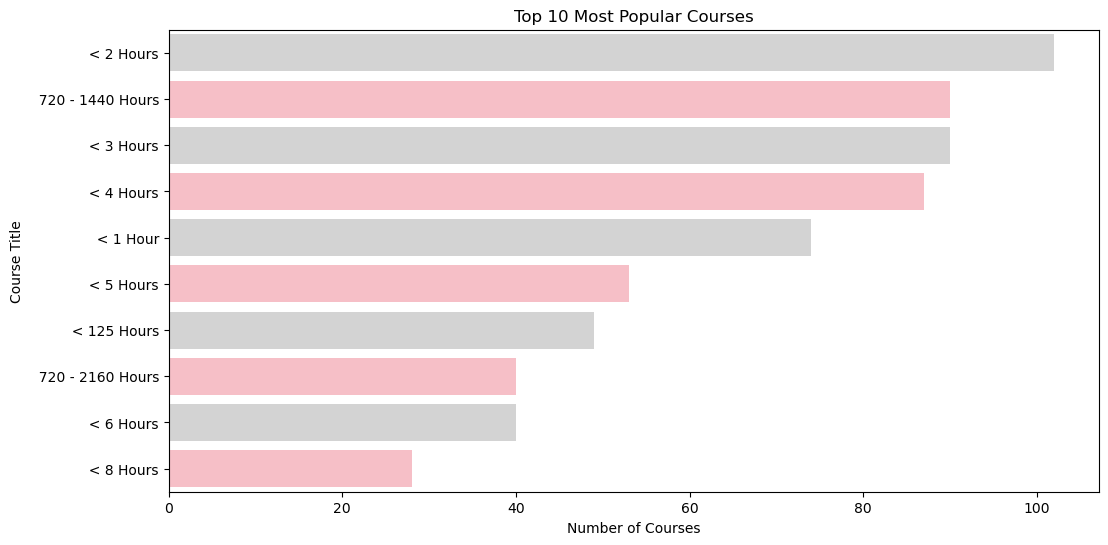

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(data=laimoon, y=' duaration', order=laimoon[' duaration'].value_counts().index[:10], palette=['lightgray', '#FFB6C1'])
plt.title('Top 10 Most Popular Courses')
plt.xlabel('Number of Courses')
plt.ylabel('Course Title')
plt.show()# count categorical value to idetify frequency     horizontal count plot 

# 8.what is the courses have a price greater than '$ 340'?

In [46]:
numCoursesPrice_35 = laimoon[laimoon['afterDiscount'] >= 340.0]
numCoursesPrice_35



course_Title     duaration  \
0                Machine Learning Certification Zaka      86 Hours   
1       Microsoft SQL Server Elegant Training Center    < 22 Hours   
2  Certificate in Fintech and Blockchain  LEORON ...      72 Hours   

   afterDiscount  beforeDiscount  
0           2967             NaN  
1            340           680.0  
2           4270             NaN

# 9.what is basic statistical summary of numerical columns

In [47]:
print(laimoon.describe())
print()

       afterDiscount  beforeDiscount
count     999.000000      531.000000
mean       48.390390      410.580038
std       172.642732      816.408013
min         3.000000       20.000000
25%        16.000000      140.000000
50%        24.000000      260.000000
75%        35.000000      480.000000
max      4270.000000     6400.000000



# 10.What does the distribution of course durations ?

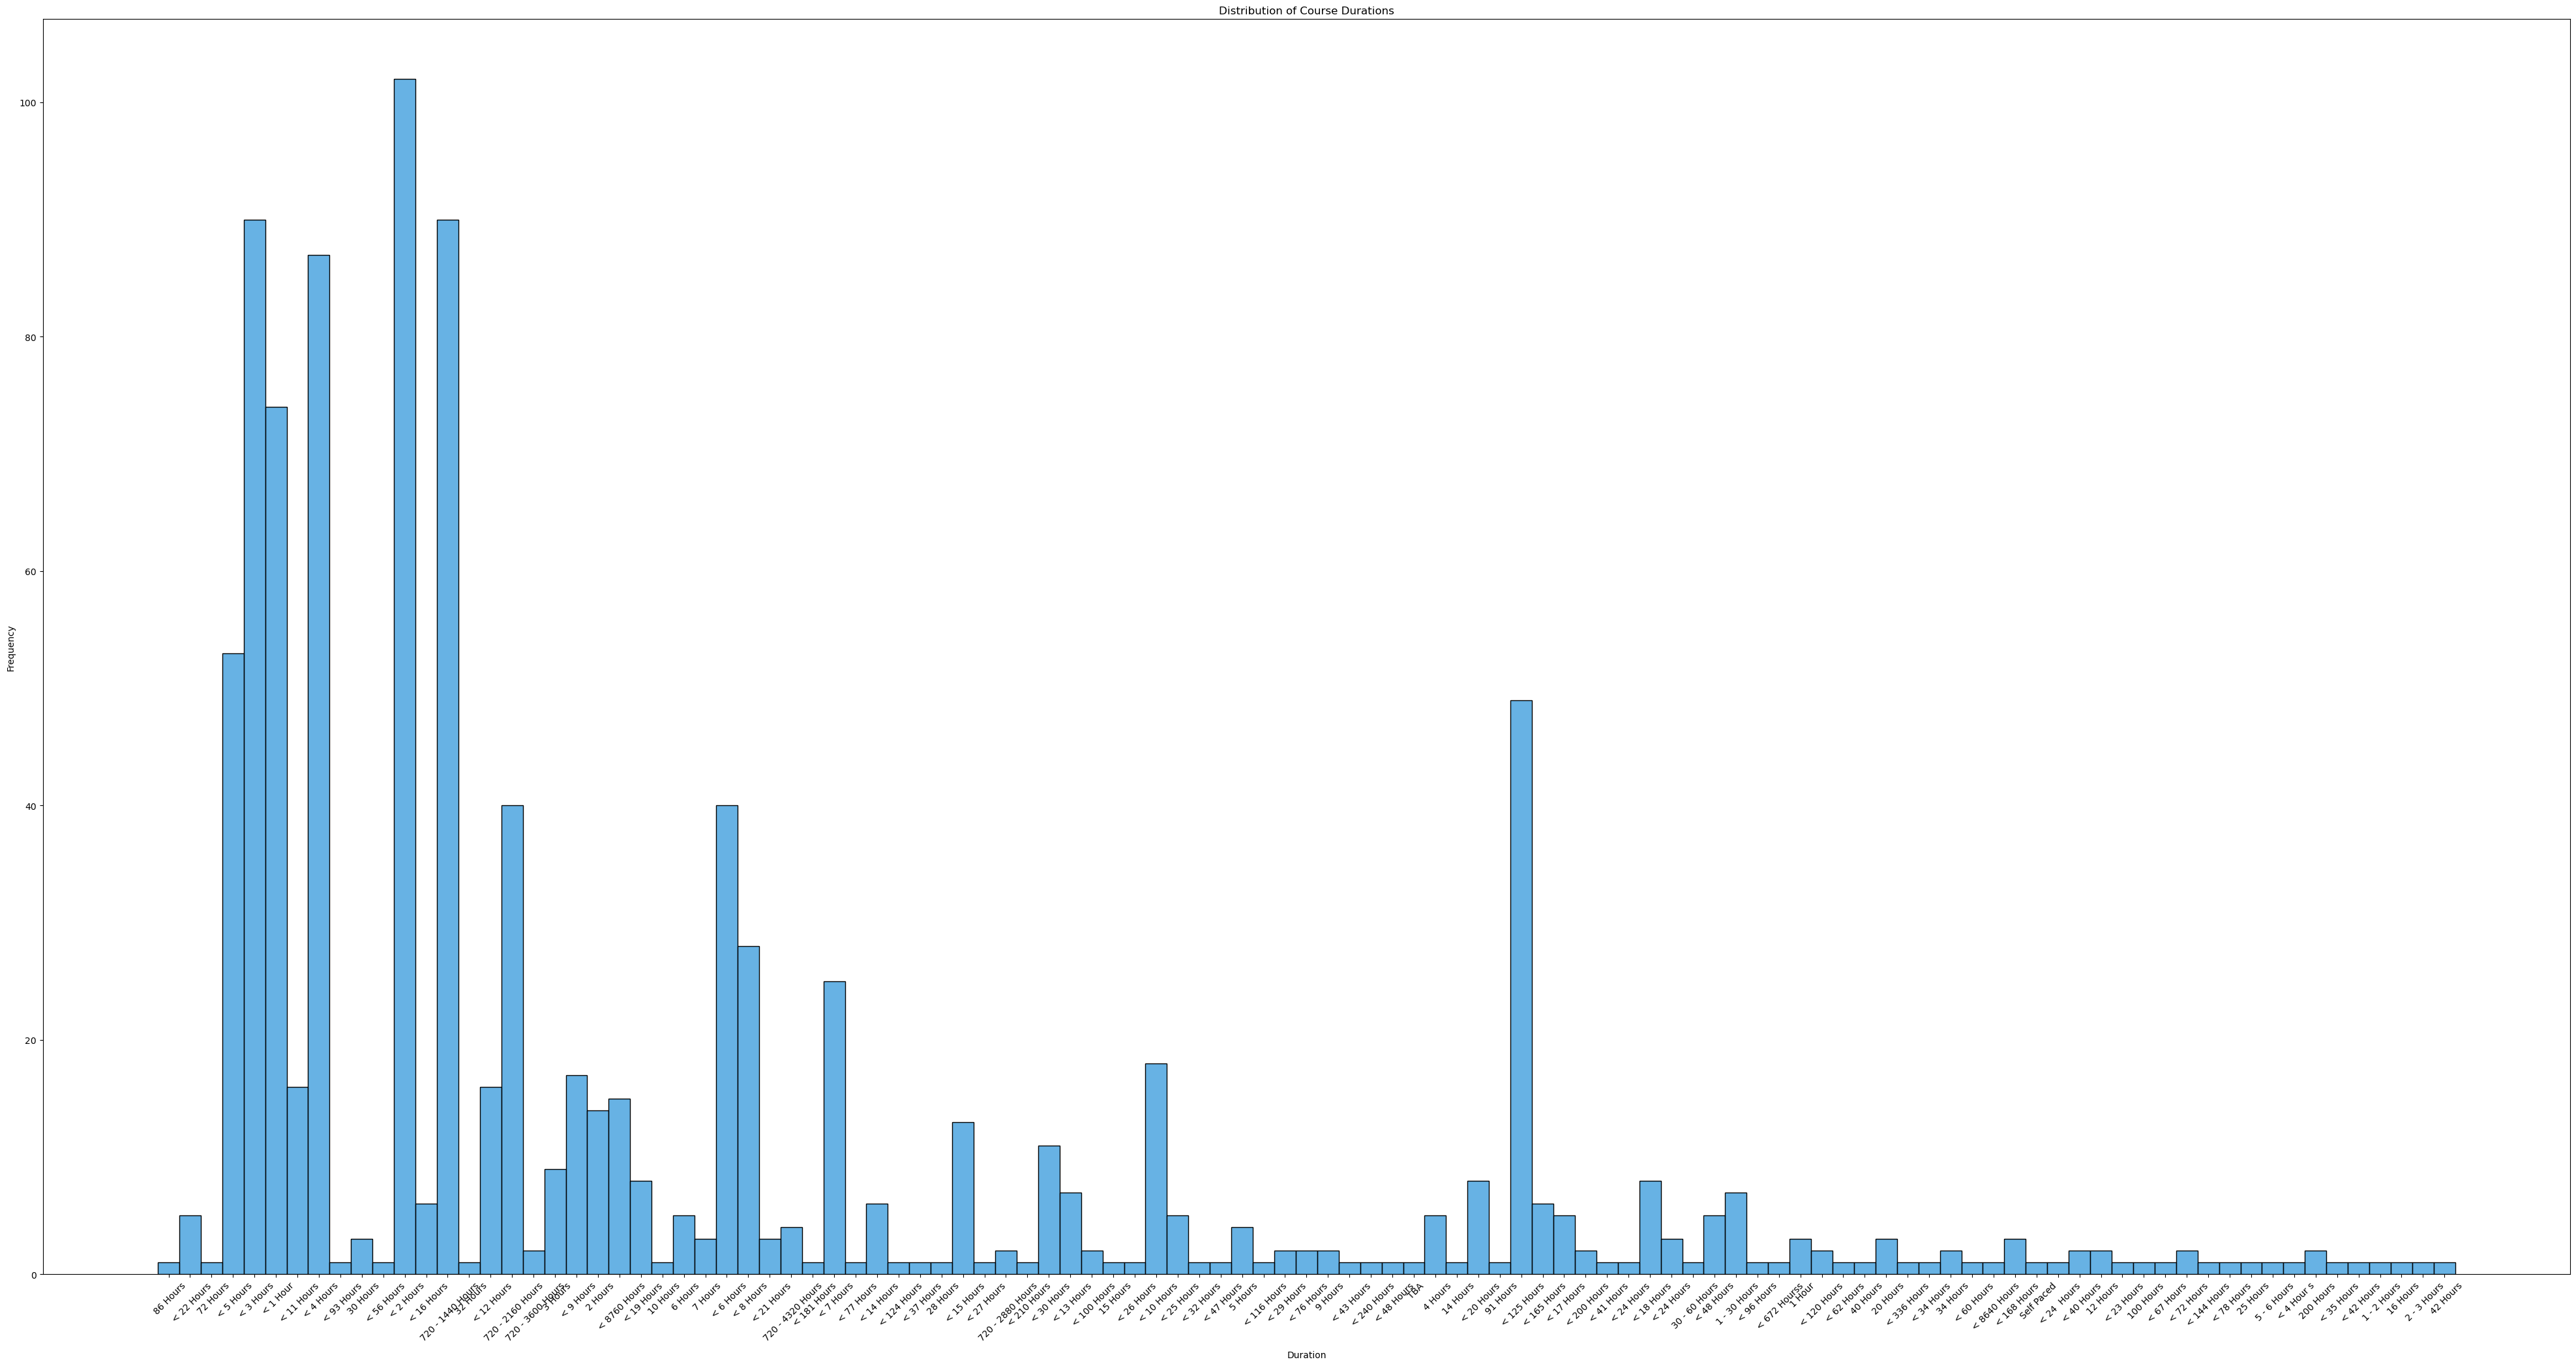

In [48]:
plt.figure(figsize=(50, 25))
sns.histplot(data=laimoon, x=' duaration', bins=20, color='#3498db')
plt.title('Distribution of Course Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show() #display frequency  of each category     histplot

#  11. How many courses have discounts applied?

In [49]:
numDiscountedCourses = len(laimoon[laimoon['afterDiscount'] < laimoon['beforeDiscount']])
numDiscountedCourses

531

# 12. How much did the courses earn before and after discounts?

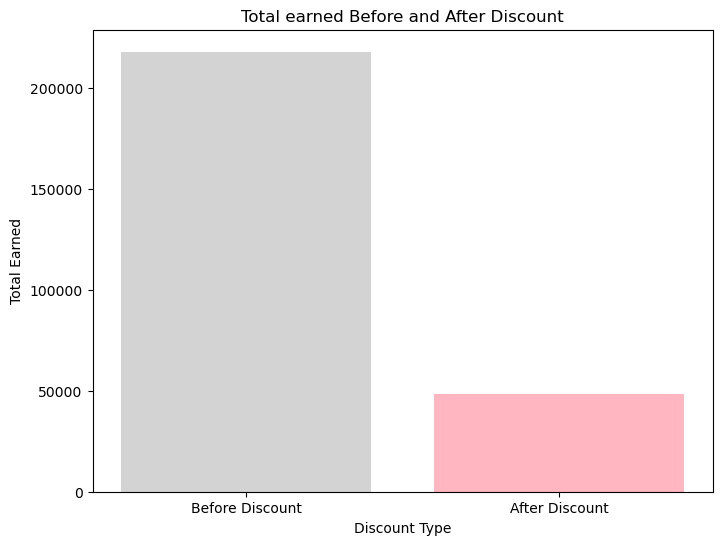

In [50]:
totalEarneBeforeDiscount = laimoon['beforeDiscount'].sum()
totalEarnAfterDiscount = laimoon['afterDiscount'].sum()


plt.figure(figsize=(8, 6))
plt.bar(['Before Discount', 'After Discount'], [totalEarneBeforeDiscount, totalEarnAfterDiscount], color=['lightgray', '#FFB6C1'])
plt.title('Total earned Before and After Discount')
plt.xlabel('Discount Type')
plt.ylabel('Total Earned')
plt.show() #comparison    #  bar plot

# 13.What is the median price of the courses after discount?

In [51]:
medianPriceAfterDiscount = laimoon['afterDiscount'].median()
medianPriceAfterDiscount


24.0

# 14-How does the distribution of before discount prices vary across the dataset?

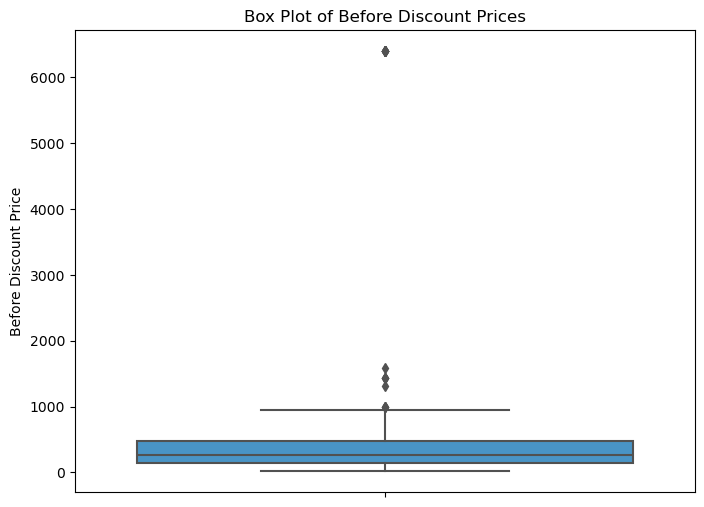

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=laimoon, y='beforeDiscount', color='#3498db')
plt.title('Box Plot of Before Discount Prices')
plt.ylabel('Before Discount Price')
plt.show()


# 15-What are the correlations between price ?

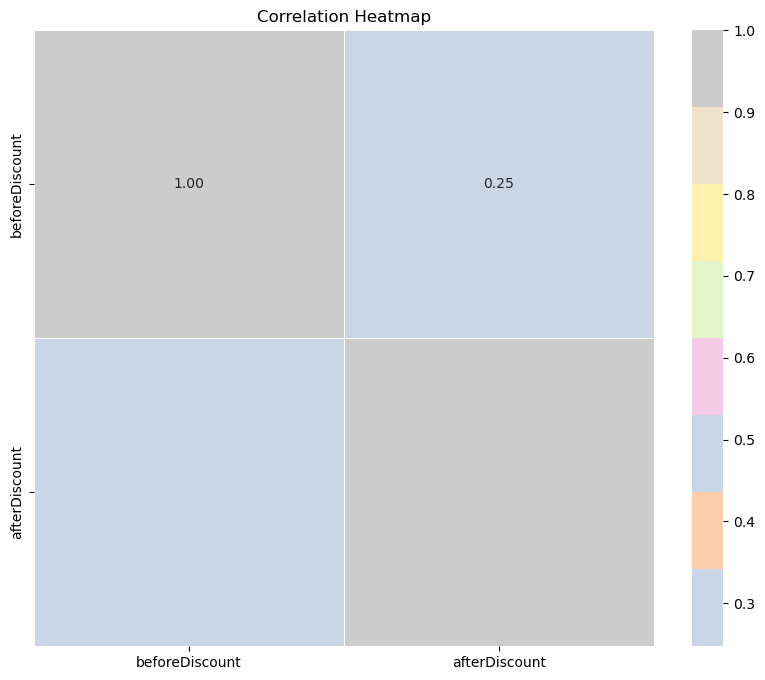

In [53]:
# Select only numeric columns
numericalCols = ['beforeDiscount', 'afterDiscount']
correlationMatrix = laimoon[numericalCols].corr() 
plt.figure(figsize=(10, 8))
cmap = sns.color_palette("Pastel2")
cmap[0] = ("#CBD5E8")
sns.heatmap(correlationMatrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# numeric_columns = laimoon.select_dtypes(include=['int64','float64']) 
# plt.figure(figsize=(8, 6))
# cmap = sns.color_palette("Pastel2")
# cmap[1] = (1.0, 0.8, 0.8)
# sns.heatmap(numericalCols.corr(), annot=True, cmap=cmap)
# plt.title('Correlation Heatmap')
# plt.show()


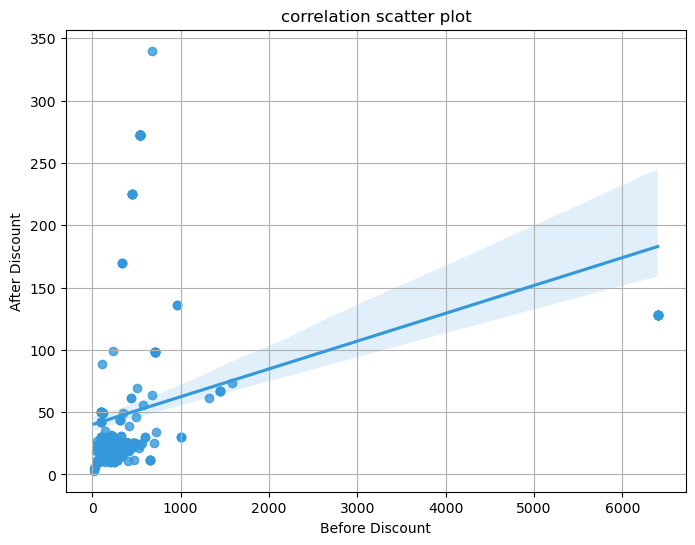

In [54]:
plt.figure(figsize=(8, 6))
sns.regplot(x='beforeDiscount', y='afterDiscount', data=laimoon, color='#3498db')
plt.title('correlation scatter plot')
plt.xlabel('Before Discount')
plt.ylabel('After Discount')
plt.grid(True)
plt.show()# one value tended to increase and anthor tend to decrease 